<a href="https://colab.research.google.com/github/devhassan82/AI_ASSIGNMEN1/blob/main/Estimation_of_Houses_Prices4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Estimation of Houses Prices - Data Science project


## Import Libraries
All libraries are used for specific tasks including data preprocessing, visualization, transformation and evaluation

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")


---------------------------------------------------------

"--------------Business Problem: Estimate the price of a used car based on chara/features such as manufacturer name, transmission, color...-----------"

## Import Data
### Read Training Data
The training set is read locally and the **head** function is used to display the data for intial understanding

"======Data understanding======"

In [60]:
import pandas as pd

dataTrain = pd.read_csv('//content/House_Price_Prediction.csv')

dataTrain.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [61]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [62]:
type(dataTrain)  #data type

pandas.core.frame.DataFrame

The **shape** function displays the number of rows and columns in the training set

In [63]:
dataTrain.shape # check dimension

(2000, 9)

Checking for null values in each column and displaying the sum of all null values in each column (Training Set)

In [64]:
dataTrain.isnull().sum()

,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [65]:
#Show me the locations where the null values are
dataTrain[dataTrain.isnull().any(axis=1)]

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price


In [66]:
dataTrain = dataTrain.dropna() # Dropping those records having null values

Checking if null values are eliminated (Training set)

In [67]:
dataTrain.isnull().sum()

,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [68]:
dataTrain.shape # printing the shape -- Yes, 15 rows containing null values are removed

(2000, 9)

Checking the data types

In [ ]:
dataTrain.dtypes  # checking the data type of every column

,0
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object
Price,int64


Checking the correlation between the numerical features and with the target

## EDA (Exploratory Data Analysis)
Visualizations are used to understand the relationship between the target variable and the features, in addition to correlation coefficient.
The visuals include heatmap,boxplot etc.


# Heat map

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


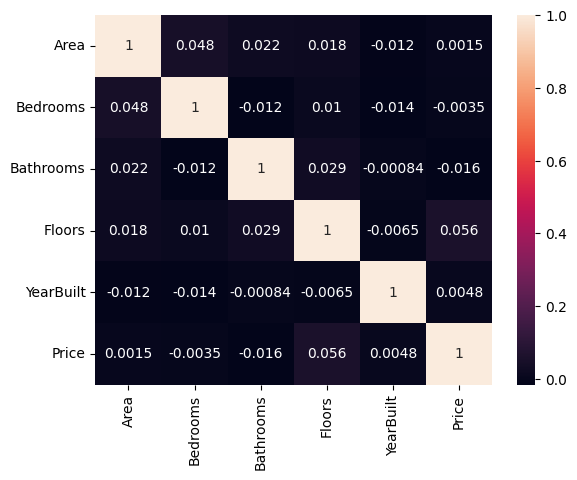

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


# Compute correlation matrix for numerical columns
%time
corr = dataTrain.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()



Descriptive statistics

In [70]:
dataTrain.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


A descriptive analysis to check incorrect entries and anormalies.

1. Count: The number of values in the dataframe.
2. Mean: The arithmetic mean or average of the values.
3. Standard Deviation (std): A measure of the dispersion or spread of the values.
4. Minimum: The minimum (smallest) value in each column.
5. 25th Percentile (25%): The value below which 25% of the data falls (1st quartile). Means 25% of the entire data falls under the value 500.750000 for odometer_value
6. 50th Percentile (50%): The median or value below which 50% of the data falls (2nd quartile).
7. 75th Percentile (75%): The value below which 75% of the data falls (3rd quartile).
8. Maximum: The maximum (largest) value in the Series.

**************************************************************

#Looking at the "minimum price", 50005.000000 USD is found.
#This could be a wrong entry (or an outlier)




In [71]:
#Search for price = 50005 , if so, change the price to 100000
dataTrain.loc[dataTrain['Price'] == 50005, 'Price'] = 100000

In [72]:
dataTrain.describe()  # now still the minimum price is 50064 USD

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537701.85250
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276386.98078
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50064.00000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.00000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.00000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.00000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.00000


In [ ]:
#Search for price < 100000 , if so, change the price to 100000
dataTrain.loc[dataTrain['Price'] < 100000, 'Price'] = 100000

In [73]:
dataTrain.describe()  # now the minimum price is 100000 USD

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537701.85250
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276386.98078
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50064.00000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.00000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.00000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.00000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.00000


### Regression/scatter Plot
This regression plot shows the relation between Floors and price.A slight positive correlation is observed which shows that price is being affected by the number of the floors.

<Axes: xlabel='Floors', ylabel='Price'>

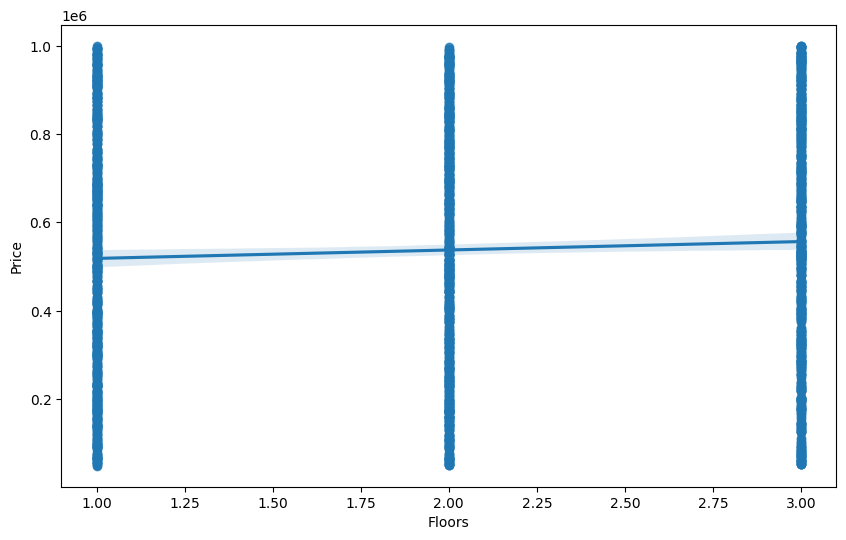

In [74]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Floors", y="Price", data=dataTrain)

As observed in the plot, a **negative correlation** is observed

In [75]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Floors'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.05578762535508096  with a P-value of P = 0.012585705310870162


The Pearson correlation coefficient (r) was obtained at 0.0566 with a probability (p) value of 0.011294.

The Pearson correlation coefficient (r) is a measure of the linear relationship between two variables. Its values ​​can range from -1 to 1.

If the r value is close to 1, this indicates a strong positive linear relationship. This means that as one variable increases, the other variable tends to increase as well.

If the r value is close to -1, this indicates a strong negative linear relationship. This means that as one variable increases, the other variable tends to decrease.

If the r value is close to 0, this indicates a weak or nonexistent linear relationship. In other words, the two variables are not strongly related.

In our case, the Pearson correlation coefficient is approximately 0.0566, which is closer to 1 than to 0. This indicates a moderate positive linear relationship between the two correlated variables.

The probability value here (which corresponds to the odometer values) confirms a strong correlation, and therefore this feature is an essential feature for predicting house prices.

The regression chart below illustrates the relationship between house ِArea and price. There is no correlation between the two variables, indicating that price is not affected by house Area.

<Axes: xlabel='Area', ylabel='Price'>

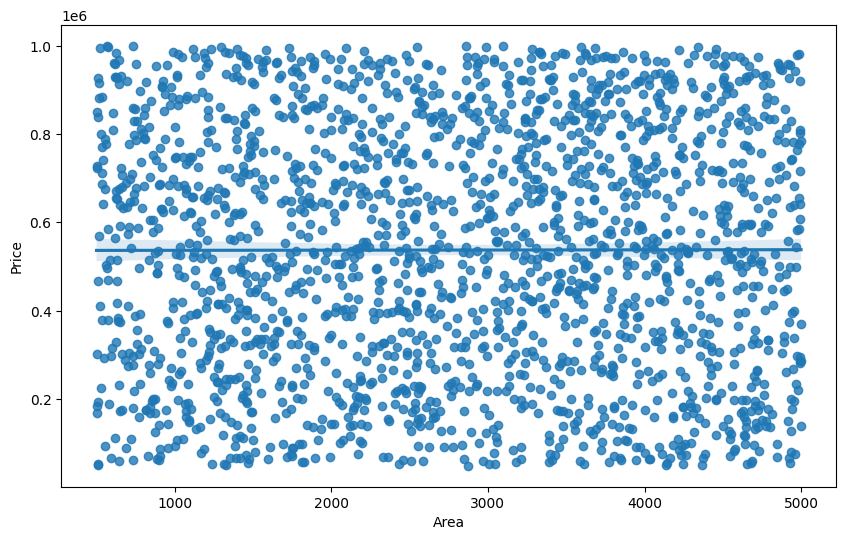

In [76]:
plt.figure(figsize=(10,6))
sns.regplot(x="Area", y="Price", data=dataTrain)

Here a low positive correlation of 0.0017832 with a p-value of 0.93647 is calculated which indicates that the correlation between the variables is weak and hence the use of the feature produced in the year for prediction is weak.

In [77]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Area'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.0016453244439055947  with a P-value of P = 0.9413802388271011


The regression chart below illustrates the relationship between YearBuilt and price. There is no correlation between the two variables, indicating that price is not affected by YearBuilt.

<Axes: xlabel='YearBuilt', ylabel='Price'>

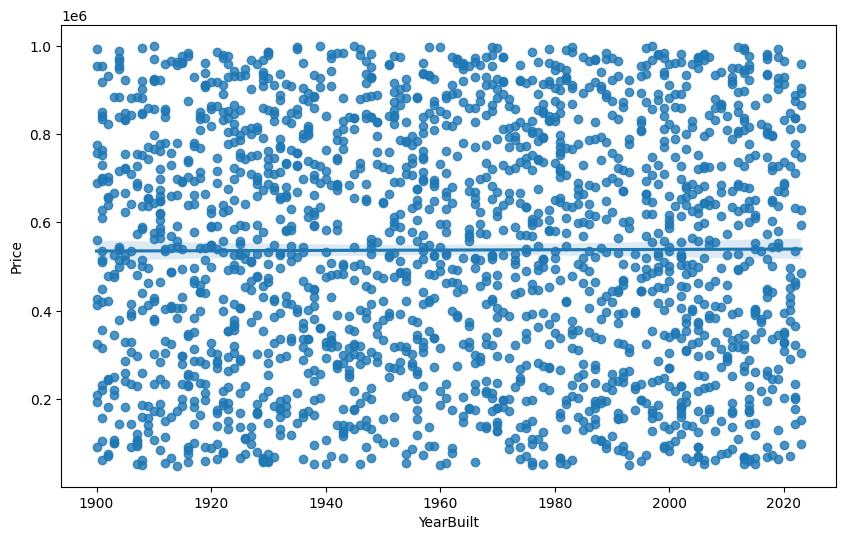

In [78]:
plt.figure(figsize=(10,6))
sns.regplot(x="YearBuilt", y="Price", data=dataTrain)

Here a low positive correlation of 0.004890 with a p-value of 0.82698 is calculated which indicates that the correlation between

the variables is weak and hence the use of the feature produced in the year for prediction is weak.

In [79]:
pearson_coef, p_value = stats.pearsonr(dataTrain['YearBuilt'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.004708763818344512  with a P-value of P = 0.8333150402411251


The regression chart below illustrates the relationship between Bedrooms and price. There is no correlation between the two variables, indicating that price is not affected by Bedrooms.

<Axes: xlabel='Bedrooms', ylabel='Price'>

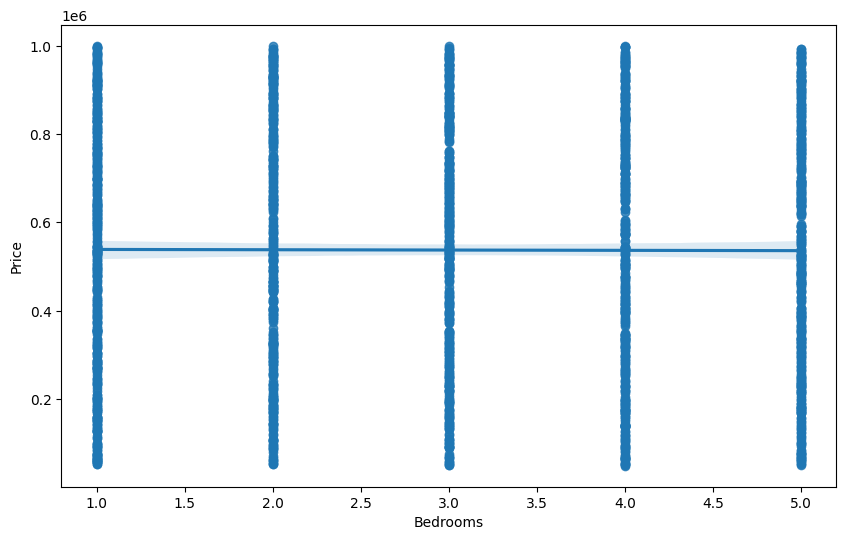

In [80]:
plt.figure(figsize=(10,6))
sns.regplot(x="Bedrooms", y="Price", data=dataTrain)

Here, a low positive correlation of 0.003706 with a p-value of 0.86843 was calculated, indicating a weak correlation between the variables and, therefore, a weak use of the feature produced during the year for prediction.

In [81]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Bedrooms'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.003534769838949635  with a P-value of P = 0.8744714725139072


The regression chart below illustrates the relationship between Bathrooms and price. There is no correlation between the two variables, indicating that price is not affected by Bathrooms.

<Axes: xlabel='Bathrooms', ylabel='Price'>

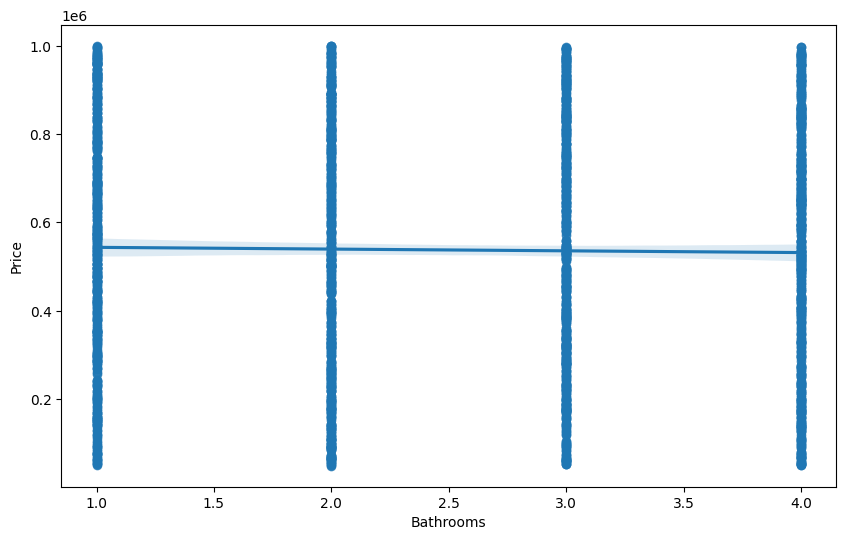

In [82]:
plt.figure(figsize=(10,6))
sns.regplot(x="Bathrooms", y="Price", data=dataTrain)

Here, a low positive correlation of 0.015573 with a p-value of 0.48637 was calculated, indicating a weak correlation between the variables and, therefore, a weak use of the feature produced during the year for prediction.

In [83]:
pearson_coef, p_value = stats.pearsonr(dataTrain['Bathrooms'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.01578483772792216  with a P-value of P = 0.48048542776478864


---- this plot shows no correlation with points all over the graph ----

### Box Plot
These plots are used for categorical data to determine the importance of features for prediction.

The box plot shows how price vary based on different location. This shows that Location can be used as a feature for price prediction.


<Axes: xlabel='Location', ylabel='Price'>

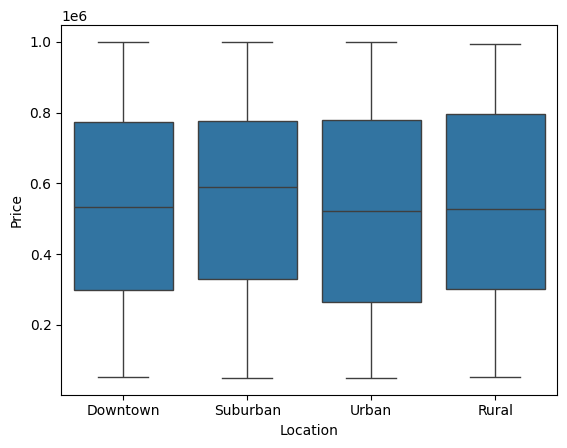

In [84]:
sns.boxplot(x="Location", y="Price", data=dataTrain)

The box plot shows how price vary based on different location. This shows that Location can be used as a feature for price prediction.





<Axes: xlabel='Condition', ylabel='Price'>

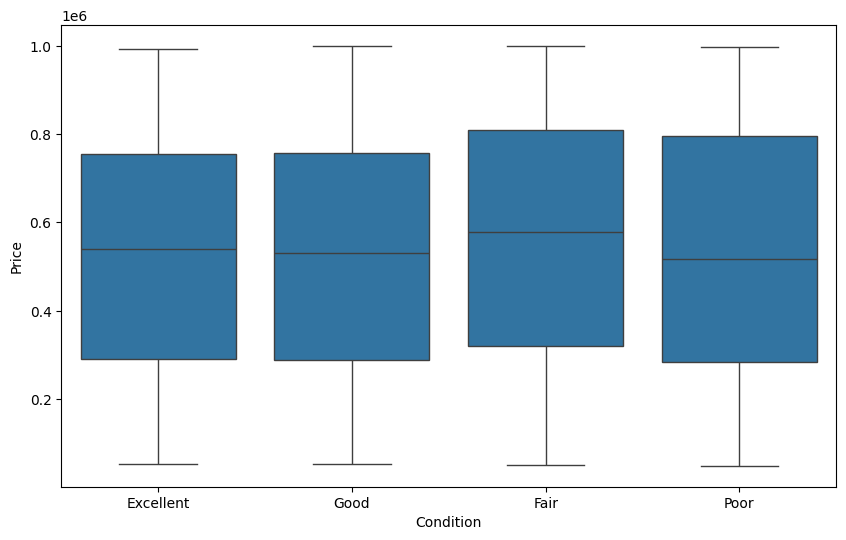

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Condition", y="Price", data=dataTrain)

This chart illustrates condition and its impact on price. A home in better condition has a slightly higher price range, while a home in poorer condition has a lower price. This feature can be used for predicting.

<Axes: xlabel='Garage', ylabel='Price'>

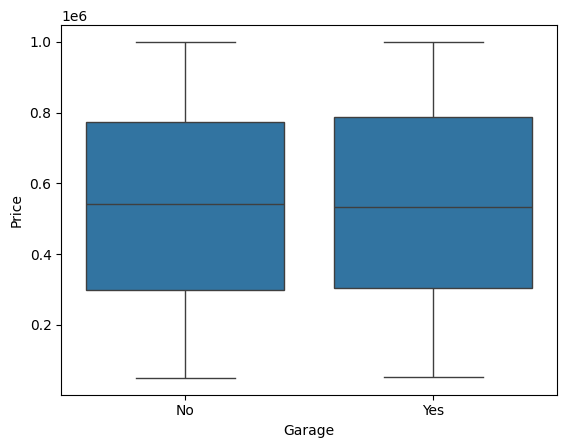

In [86]:
sns.boxplot(x="Garage", y="Price", data=dataTrain)

The Garage (based on Garage column) shows that the house with garage or witout garage have almost the same price range which will not bring differences in price when prediction is made. Hence this feature is not suitable for price prediction

In [87]:
dataTrain.drop(['Garage'], axis = 1, inplace = True)

Same features are removed for testing set since the data will be used to train the model

In [90]:
dataTrain.shape


(2000, 8)

### Data Transformation
Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data.

----Data Preparation--------

In [89]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.Location = labelencoder.fit_transform(dataTrain.Location)
dataTrain.Condition = labelencoder.fit_transform(dataTrain.Condition)




Label encoding of all categorical data in the testing set.

Checking on the remaining features and if label encoding is applied to all categorical features (Training set).

In [ ]:
dataTrain.head(10)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Price
0,1360,5,4,3,1970,0,0,149919
1,4272,5,4,3,1958,0,0,424998
2,3592,2,2,3,1938,0,2,266746
3,966,4,2,2,1902,2,1,244020
4,4926,1,4,2,1975,0,1,636056
5,3944,1,2,1,1906,3,3,100000
6,3671,1,1,2,1948,1,3,448722
7,3419,2,4,1,1925,2,2,594893
8,630,2,2,1,1932,1,3,652878
9,2185,3,3,1,2000,0,3,340375


Check on the remaining features and application of label encoding to all categorical features (Testing set).

--Data Transfornation (normalization) ----
minmax is used for scaling down the features between the range of -1 and 1. This helps the model make better prediction as it is easy to understand. The scaling is applied to the training and testing set  --- You can try using z score normalization also

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrain = scaler.fit_transform(dataTrain)

In [92]:
dataTrain

array([[0.19097377, 1.        , 1.        , ..., 0.        , 0.        ,
        0.10515569],
       [0.83837261, 1.        , 1.        , ..., 0.        , 0.        ,
        0.39483694],
       [0.68719431, 0.25      , 0.33333333, ..., 0.        , 0.66666667,
        0.22818431],
       ...,
       [0.1247221 , 1.        , 0.        , ..., 0.33333333, 1.        ,
        0.44952043],
       [0.79168519, 0.5       , 0.        , ..., 1.        , 0.        ,
        0.11695023],
       [0.55313473, 1.        , 0.        , ..., 0.66666667, 0.33333333,
        0.4554177 ]])

Dividing the data for training and testing accordingly. X takes the all features while Y takes the target variable


In [93]:
# Convert the NumPy array back into a Pandas DataFrame
dataTrain = pd.DataFrame(dataTrain, columns=['Area', 'Bedrooms', 'Bathrooms', 'Floors','YearBuilt','Location', 'Condition', 'Price'])

# Now you can use drop on dataTrain
x_train=dataTrain.drop('Price',axis=1)
y_train=dataTrain[['Price']]

In [94]:
#In case you have no separate testing data, use the following code
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
#30% of the trainng data will be used for testing


In [95]:
x_train.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition
1719,0.399511,0.25,0.666667,1.0,0.211382,1.000000,0.333333
1702,0.023121,0.25,0.333333,1.0,0.146341,0.333333,0.666667
1287,0.375500,0.50,0.000000,0.5,0.211382,0.000000,1.000000
482,0.256558,0.75,0.000000,0.0,0.983740,0.666667,0.000000
768,0.248333,0.25,0.666667,0.5,0.365854,1.000000,1.000000


In [96]:
y_train.head()

,Price
1719,0.929408
1702,0.800197
1287,0.623104
482,0.449447
768,0.285112


In [97]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1400, 7)
(1400, 1)
(600, 7)
(600, 1)


## Fit Model
### Multiple Linear Regression
Calling multiple linear regression model and fitting the training set

In [98]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

Making price prediction using the testing set (Fit to MLR)




In [ ]:
y_pred1 = model_mlr.predict(x_test)


### MLR Evaluation


Calculating the Mean Square Error for MLR model

In [99]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.07950114566165775


Calculating the Mean Absolute Error for MLR model

In [100]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.24197873117607435


### Random Forest Regressor (checking other Models)
Calling the random forest model and fitting the training data

In [ ]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

Prediction of house prices using the testing data

In [ ]:
y_pred2 = model_rf.predict(x_test)

### Random Forest Evaluation


Calculating the Mean Square Error for Random Forest Model (Lowest MSE value)

In [101]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.09102145521860532


Calculating the Mean Absolute Error for Random Forest Model (Lowest Mean Absolute Error)

In [102]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.2603488127974285


### LASSO Model
Calling the model and fitting the training data

In [103]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

Price prediction uisng testing data

In [104]:
y_pred3 = model_lm.predict(x_test)

### LASSO Evaluation  (checking another model)


Mean Absolute Error for LASSO Model

In [ ]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.25336938009533383


Mean Squared Error for the LASSO Model

In [105]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  0.07859190887878331


In [106]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [107]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.241979
1,Random Forest,0.260349
2,LASSO,0.253369


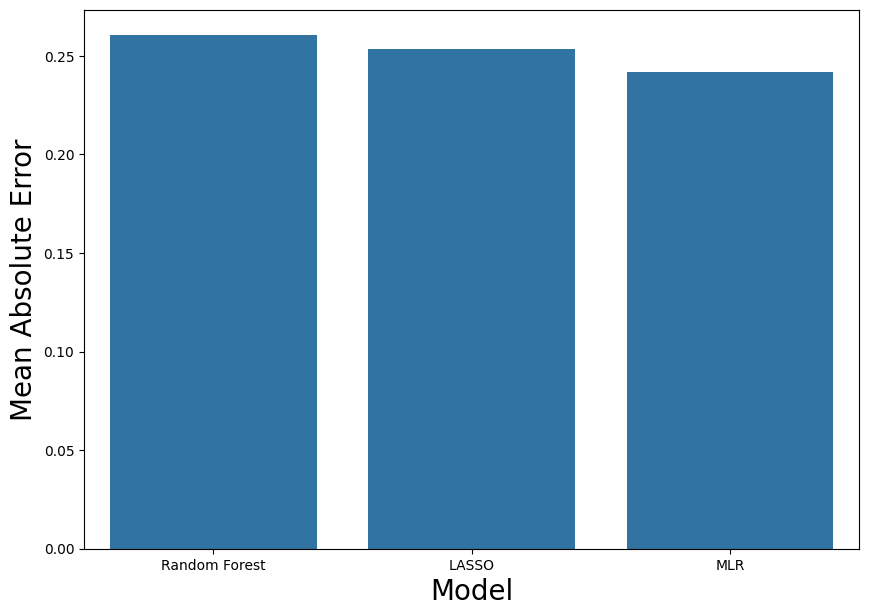

In [108]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

Based on the MAE, it is concluded that the MLR is the best regression model for predicting the house price based on the 7 predictor variables

**user** **interface**

In [109]:

import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Assuming model_mlr is already trained
# You will also need the scaler and label encoders used during training
# to transform the user input correctly before passing it to the model.
# Make sure you have kept track of these or retrain them on the original data
# if you plan to deploy this interface later.

# Create input widgets
area_widget = widgets.FloatSlider(description="Area:")
bedrooms_widget = widgets.FloatSlider(description="Bedrooms:")
bathrooms_widget = widgets.FloatSlider(description="Bathrooms:")
floors_widget = widgets.FloatSlider(description="Floors:")
yearbuilt_widget = widgets.FloatSlider(description="YearBuilt:")

# For Location and Condition, you'll need the list of unique categories
# from your training data to create the dropdown options.
# Assuming you have stored the label encoders:
# location_options = list(labelencoder_location.classes_)
# condition_options = list(labelencoder_condition.classes_)
# Replace with your actual label encoder objects and their classes
location_options = ['Location A', 'Location B', 'Location C'] # Replace with actual locations
condition_options = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'] # Replace with actual conditions


location_widget = widgets.Dropdown(options=location_options, description="Location:")
condition_widget = widgets.Dropdown(options=condition_options, description="Condition:")


predict_button = widgets.Button(description="Predict Price")
output_widget = widgets.Output()

def predict_price(b):
    with output_widget:
        output_widget.clear_output()
        try:
            # Get input values from widgets
            input_data = {
                'Area': area_widget.value,
                'Bedrooms': bedrooms_widget.value,
                'Bathrooms': bathrooms_widget.value,
                'Floors': floors_widget.value,
                'YearBuilt': yearbuilt_widget.value,
                'Location': location_widget.value,
                'Condition': condition_widget.value
            }

            # Create a DataFrame from input data
            input_df = pd.DataFrame([input_data])

            # Apply the same preprocessing steps as done during training
            # You need to apply label encoding and scaling here
            # Make sure you use the same label encoders and scaler fitted on the training data

            # Example (you need to replace this with your actual preprocessing):
            # input_df['Location'] = labelencoder_location.transform(input_df['Location'])
            # input_df['Condition'] = labelencoder_condition.transform(input_df['Condition'])
            # input_scaled = scaler.transform(input_df)
            # input_scaled_df = pd.DataFrame(input_scaled, columns=input_df.columns) # Keep column names

            # For demonstration purposes, let's assume you skip preprocessing for now
            # and pass the raw numerical input directly (this is not recommended for accurate predictions)
            # You need to replace this with the correct preprocessing step

            # Example with dummy preprocessing for demonstration:
            preprocessed_input = pd.DataFrame([[
                area_widget.value,
                bedrooms_widget.value,
                bathrooms_widget.value,
                floors_widget.value,
                yearbuilt_widget.value,
                # You need to replace these with the actual encoded values
                location_options.index(location_widget.value),
                condition_options.index(condition_widget.value)
            ]], columns=['Area', 'Bedrooms', 'Bathrooms', 'Floors','YearBuilt','Location', 'Condition'])

            # Predict using the trained model
            predicted_price = model_mlr.predict(preprocessed_input)[0][0]

            print(f"Predicted House Price: ${predicted_price:.2f}")

        except Exception as e:
            print(f"Error: {e}")

predict_button.on_click(predict_price)

# Arrange widgets
input_widgets = widgets.VBox([
    area_widget,
    bedrooms_widget,
    bathrooms_widget,
    floors_widget,
    yearbuilt_widget,
    location_widget,
    condition_widget
])

ui = widgets.VBox([input_widgets, predict_button, output_widget])

# Display the UI
display(ui)